In [1]:
import pickle 
import os
from datetime import datetime,timezone,timedelta

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from tqdm import tqdm
from scipy import signal

import data_filter as dafi
import data_process as dapr
import lib_plot

In [23]:
with open('saved_dictionary.pkl', 'rb') as f:
    ts_dict = pickle.load(f)

In [82]:
mean_dict = {}
std_dict = {}
res_ts_dict = {}
for ele in ts_dict:
    mean_dict[ele] = {}
    std_dict[ele] = {}
    res_ts_dict[ele] = {}
    for t_range in ts_dict[ele]:
        mean_dict[ele][t_range] = {}
        std_dict[ele][t_range] = {}
        res_ts_dict[ele][t_range] = {2:{},3:{}}

        mean_dict[ele][t_range][2] = np.mean(list(ts_dict[ele][t_range][2].values()))
        mean_dict[ele][t_range][3] = np.mean(list(ts_dict[ele][t_range][3].values()))

        std_dict[ele][t_range][2] = np.std(list(ts_dict[ele][t_range][2].values()))
        std_dict[ele][t_range][3] = np.std(list(ts_dict[ele][t_range][3].values()))

        for timepoint in ts_dict[ele][t_range][2]:
            res_ts_dict[ele][t_range][2][timepoint] = -(ts_dict[ele][t_range][2][timepoint]-mean_dict[ele][t_range][2])
        for timepoint in ts_dict[ele][t_range][3]:
            res_ts_dict[ele][t_range][3][timepoint] = -(ts_dict[ele][t_range][3][timepoint]-mean_dict[ele][t_range][3])


In [83]:
data_dict = std_dict
x_max_ele = list(data_dict.keys())
y_t_r = list(data_dict[x_max_ele[0]])
x_max_ele.insert(0,0)
y_t_r.insert(0,0)


data2 = np.zeros((5,5))
for i,ele in enumerate(data_dict):
    for j,t_range in enumerate(data_dict[ele]):
        data2[i,j]= data_dict[ele][t_range][2]

C:\Users\yuziq\AppData\Local\Temp\ipykernel_11028\2337229508.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(y_t_r)
C:\Users\yuziq\AppData\Local\Temp\ipykernel_11028\2337229508.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(x_max_ele)


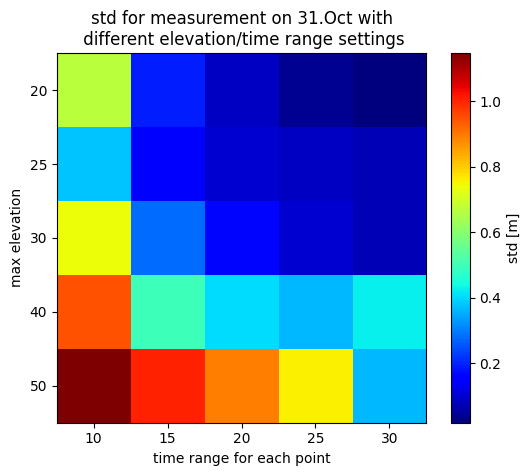

In [84]:
fig,ax = plt.subplots()
im = ax.imshow(data2,cmap='jet')
ax.set_xticklabels(y_t_r)
ax.set_yticklabels(x_max_ele)
ax.set_ylabel('max elevation')
ax.set_xlabel('time range for each point')
ax.set_title('std for measurement on 31.Oct with\n different elevation/time range settings')
cbar = fig.colorbar(im)
cbar.set_label('std [m]')

### which means if I choose max_ele=30, t_r=30, I can get the most accurate result

In [99]:
ts_gauge = pd.read_csv('20221031_gauge.csv')
gauge_time = []
gauge_mean = np.mean(ts_gauge['1'])
res_ts_gauge = []
for t,h in zip(ts_gauge['0'],ts_gauge['1']):
    gauge_time.append(datetime.fromtimestamp(t))
    res_ts_gauge.append(h-gauge_mean)

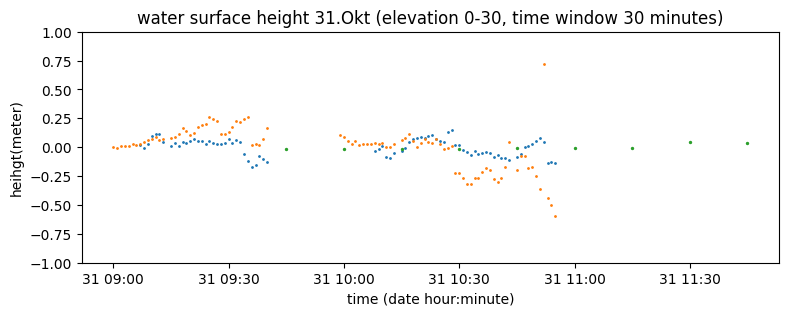

In [100]:
ts_1031_2 = res_ts_dict[30][30][2]
ts_1031_3 = res_ts_dict[30][30][3]
plt.rcParams.update({'font.size': 10})
fig,ax = plt.subplots()
ax.scatter(list(ts_1031_2.keys()), list(ts_1031_2.values()),s=1)
ax.scatter(list(ts_1031_3.keys()), list(ts_1031_3.values()),s=1)
ax.scatter(gauge_time,res_ts_gauge,s=2)
ax.set_xlabel('time (date hour:minute)')
ax.set_ylabel('heihgt(meter)')
ax.set_title('water surface height 31.Okt (elevation 0-30, time window 30 minutes)')
ax.set_ylim([-1,1])
fig.set_size_inches(9,3)

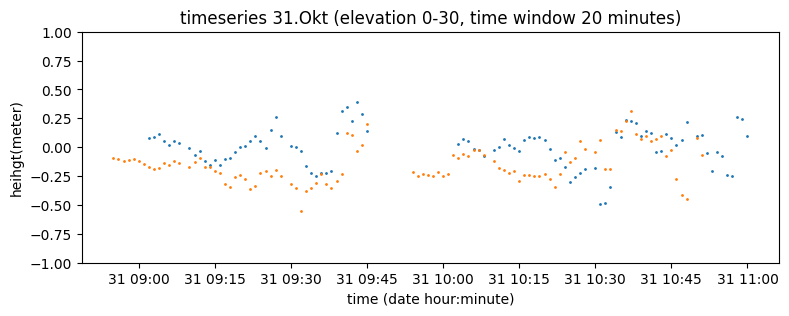

In [81]:
ts_1031_2 = res_ts_dict[30][20][2]
ts_1031_3 = res_ts_dict[30][20][3]
plt.rcParams.update({'font.size': 10})
fig,ax = plt.subplots()
ax.scatter(list(ts_1031_2.keys()), list(ts_1031_2.values()),s=1)
ax.scatter(list(ts_1031_3.keys()), list(ts_1031_3.values()),s=1)
ax.set_xlabel('time (date hour:minute)')
ax.set_ylabel('heihgt(meter)')
ax.set_title('water surface height 31.Okt (elevation 0-30, time window 20 minutes)')
ax.set_ylim([-1,1])
fig.set_size_inches(9,3)

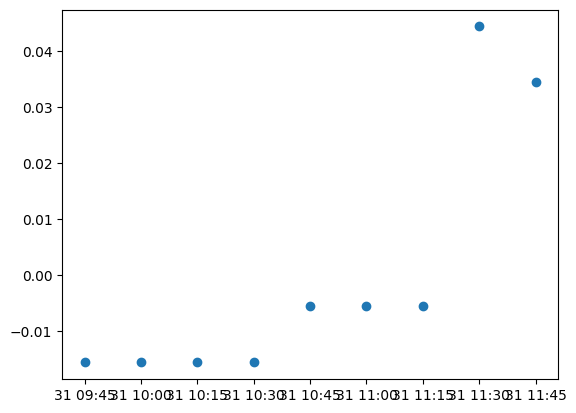

In [97]:
res_ts_gauge


[0   -0.015556
 1   -0.015556
 2   -0.015556
 3   -0.015556
 4   -0.005556
 5   -0.005556
 6   -0.005556
 7    0.044444
 8    0.034444
 Name: 1, dtype: float64,
 0   -0.015556
 1   -0.015556
 2   -0.015556
 3   -0.015556
 4   -0.005556
 5   -0.005556
 6   -0.005556
 7    0.044444
 8    0.034444
 Name: 1, dtype: float64,
 0   -0.015556
 1   -0.015556
 2   -0.015556
 3   -0.015556
 4   -0.005556
 5   -0.005556
 6   -0.005556
 7    0.044444
 8    0.034444
 Name: 1, dtype: float64,
 0   -0.015556
 1   -0.015556
 2   -0.015556
 3   -0.015556
 4   -0.005556
 5   -0.005556
 6   -0.005556
 7    0.044444
 8    0.034444
 Name: 1, dtype: float64,
 0   -0.015556
 1   -0.015556
 2   -0.015556
 3   -0.015556
 4   -0.005556
 5   -0.005556
 6   -0.005556
 7    0.044444
 8    0.034444
 Name: 1, dtype: float64,
 0   -0.015556
 1   -0.015556
 2   -0.015556
 3   -0.015556
 4   -0.005556
 5   -0.005556
 6   -0.005556
 7    0.044444
 8    0.034444
 Name: 1, dtype: float64,
 0   -0.015556
 1   -0.015556
 2  